# Import & Configuration

In [1]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.utils.tensorboard import SummaryWriter
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import warnings
# select multiline -> 'ctrl + /' -> multiline comment
# print option
torch.set_printoptions(precision=4, linewidth=50000, sci_mode=None)
# Control Warning Message
warnings.filterwarnings(action='ignore')
writer = SummaryWriter('runs')

# Preparing Data

In [2]:
datasetDir = '~/dataset'
trainData = datasets.MNIST(root=datasetDir, train=True,  download=True, transform=ToTensor())
testData  = datasets.MNIST(root=datasetDir, train=False, download=True, transform=ToTensor())
trainData

Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/woong/dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [3]:
print('[Print] Type of trainData :', type(trainData))
print('[Print] Type of trainData.data :', type(trainData.data))
print('[Print] Type of trainData.targets :', type(trainData.targets))
print('[Print] Type of trainData.classes :',type(trainData.classes))

[Print] Type of trainData : <class 'torchvision.datasets.mnist.MNIST'>
[Print] Type of trainData.data : <class 'torch.Tensor'>
[Print] Type of trainData.targets : <class 'torch.Tensor'>
[Print] Type of trainData.classes : <class 'list'>


In [4]:
print(trainData.targets)
print(trainData.classes)

tensor([5, 0, 4,  ..., 5, 6, 8])
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [5]:
print(trainData.data[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 2

In [6]:
print(trainData.targets[0])

tensor(5)


In [7]:
# Difference between trainData and trainData.data
# Difference between trainData is nomalized value of trainData.data
torch.set_printoptions(precision=1, linewidth=50000, sci_mode=None)
print(trainData[0])
torch.set_printoptions(precision=4, linewidth=50000, sci_mode=None)

(tensor([[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.5, 0.5, 0.7, 0.1, 0.7, 1.0, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.4, 0.6, 0.7, 1.0, 1.0, 1.0, 1.0

In [8]:
# [0][0]: 3D-image data [0][1]: Label
print(f'Image: {trainData[0][0].size()}')
print(f'Label: {trainData[0][1]}')

Image: torch.Size([1, 28, 28])
Label: 5


In [9]:
# trainData is nomalized using /255
print(f'trainData.data: {trainData.data[0][24][4]}')
print(f'trainData.data/255: {trainData.data[0][24][4]/255}')
print(f'trainData: {trainData[0][0][0][24][4]}')

trainData.data: 136
trainData.data/255: 0.5333333611488342
trainData: 0.5333333611488342


# Data Loader

In [10]:
trainDataset, validDataset = torch.utils.data.random_split(trainData, [50000, 10000])
print(f'trainDataset: {len(trainDataset)}')
print(f'validDataset: {len(validDataset)}')

batchSize = 64

trainDataLoader = DataLoader(trainDataset, batch_size=batchSize)
validDataLoader = DataLoader(validDataset, batch_size=batchSize)
testDataLoader  = DataLoader(testData,  batch_size=batchSize)

for imgs, labs in trainDataLoader:
	print("Shape of image [N, C, H, W]: ", imgs.shape)
	print("Shape of label             : ", labs.shape, labs.dtype)
	break

trainDataset: 50000
validDataset: 10000
Shape of image [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of label             :  torch.Size([64]) torch.int64


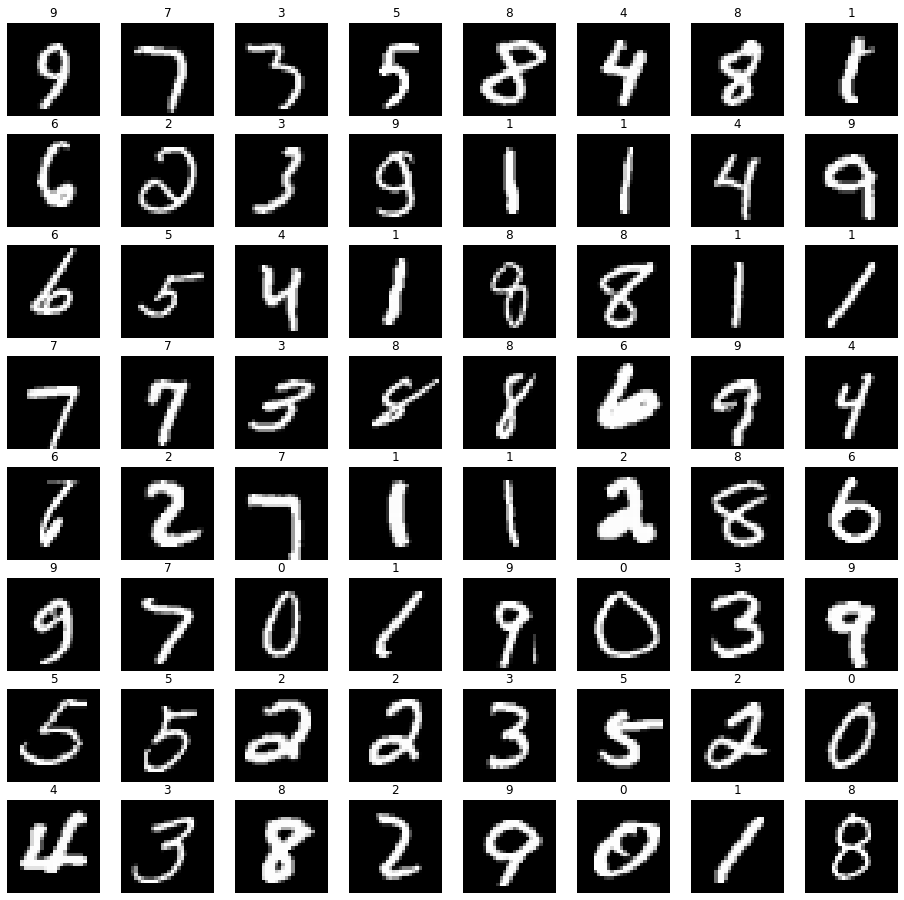

In [11]:
figure = plt.figure(figsize=(16, 16))
cols, rows = 8, 8
for i in range(cols * rows ):
	#sampleIndex = torch.randint(len(imgs), size=(1,)).item()
# 	img = imgs[sampleIndex]
# 	lab = labs[sampleIndex].item()

	img = imgs[i]
	lab = labs[i].item()
	figure.add_subplot(rows, cols, i+1)
	plt.title(lab)
	plt.axis("off")
	plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Model Build-up

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class NN(nn.Module):
	def __init__(self):
		super(NN, self).__init__()
		self.flatten = nn.Flatten()
		self.seq = nn.Sequential(
			nn.Linear(28*28, 30),
			nn.ReLU(),
			nn.Linear(30, 30),
			nn.ReLU(),
			nn.Linear(30, 10),
			nn.ReLU(),
			nn.Linear(10, 10),
			nn.ReLU()
		)

	def forward(self, x):
		x = self.flatten(x)
		logits = self.seq(x)
		return logits

model = NN().to(device)
print(model)

Using cuda device
NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (seq): Sequential(
    (0): Linear(in_features=784, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): ReLU()
    (4): Linear(in_features=30, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): ReLU()
  )
)


In [13]:
for name, param in model.named_parameters(): 
	print(f'name:{name}') 
	print(type(param)) 
	print(f'param.shape:{param.shape}') 
	print(f'param.requries_grad:{param.requires_grad}') 
	print('=====')

name:seq.0.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([30, 784])
param.requries_grad:True
=====
name:seq.0.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([30])
param.requries_grad:True
=====
name:seq.2.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([30, 30])
param.requries_grad:True
=====
name:seq.2.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([30])
param.requries_grad:True
=====
name:seq.4.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([10, 30])
param.requries_grad:True
=====
name:seq.4.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([10])
param.requries_grad:True
=====
name:seq.6.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([10, 10])
param.requries_grad:True
=====
name:seq.6.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([10])
param.requries_grad:True
=====


# Define Loss Function & Optimizer

In [14]:
lossFunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
trainLoss = 0
testLoss = 0

In [15]:
def train(trainDataLoader, model, lossFunc, optimizer, epoch, trainLoss):
	for loopInEpoch, (img, lab) in enumerate(trainDataLoader):
		img, lab = img.to(device), lab.to(device)
		pred = model(img)
		loss = lossFunc(pred, lab)

		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		
		trainLoss += loss.item()
	writer.add_scalar('trainLoss', trainLoss/len(trainDataLoader.dataset), epoch)
	trainLoss = 0

In [16]:
def test(testDataLoader, model, epoch, testLoss):
	model.eval()
	testLoss, correct = 0, 0
	with torch.no_grad():
		for img, lab in testDataLoader:
			img, lab = img.to(device), lab.to(device)
			pred = model(img)
			testLoss += lossFunc(pred, lab).item()
			correct += (pred.argmax(1) == lab).type(torch.float).sum().item()
	testLoss /= len(testDataLoader.dataset)
	correct /= len(testDataLoader.dataset)
	print(f"Accuracy: {(100*correct):>0.1f}%, Avg loss: {testLoss:>8f}")
	writer.add_scalar('testLoss', testLoss, epoch)
	testLoss = 0

In [17]:
model.state_dict().keys()

odict_keys(['seq.0.weight', 'seq.0.bias', 'seq.2.weight', 'seq.2.bias', 'seq.4.weight', 'seq.4.bias', 'seq.6.weight', 'seq.6.bias'])

In [18]:
print(model.state_dict()['seq.0.weight'][0][:8])
print(model.state_dict()['seq.2.weight'][0][:8])
print(model.state_dict()['seq.4.weight'][0][:8])
print(model.state_dict()['seq.6.weight'][0][:8])

tensor([-0.0212, -0.0068, -0.0212, -0.0313,  0.0042,  0.0205,  0.0013,  0.0200], device='cuda:0')
tensor([-0.0354,  0.0993, -0.1586, -0.0522, -0.1223, -0.1363,  0.0792, -0.1736], device='cuda:0')
tensor([ 0.0064,  0.1097, -0.0751, -0.0200, -0.0256, -0.0678, -0.1376,  0.1590], device='cuda:0')
tensor([ 0.0368,  0.0378, -0.2582, -0.2375,  0.1906, -0.2303, -0.0362, -0.3055], device='cuda:0')


# Please check in the https://www.h-schmidt.net/FloatConverter/IEEE754.html

In [19]:
model.state_dict()['seq.0.weight'][0][0]=0.3
print(model.state_dict()['seq.0.weight'][0][:8])
print(model.state_dict()['seq.2.weight'][0][:8])
print(model.state_dict()['seq.4.weight'][0][:8])
print(model.state_dict()['seq.6.weight'][0][:8])

tensor([ 0.3000, -0.0068, -0.0212, -0.0313,  0.0042,  0.0205,  0.0013,  0.0200], device='cuda:0')
tensor([-0.0354,  0.0993, -0.1586, -0.0522, -0.1223, -0.1363,  0.0792, -0.1736], device='cuda:0')
tensor([ 0.0064,  0.1097, -0.0751, -0.0200, -0.0256, -0.0678, -0.1376,  0.1590], device='cuda:0')
tensor([ 0.0368,  0.0378, -0.2582, -0.2375,  0.1906, -0.2303, -0.0362, -0.3055], device='cuda:0')


In [20]:
epochs = 10
for epoch in range(epochs):
    print(f"Epoch {epoch+1:3d}: ", end='')
    train(trainDataLoader, model, lossFunc, optimizer, epoch, trainLoss)
    test(validDataLoader, model, epoch, testLoss)
print("Done!")
writer.close()

Epoch   1: Accuracy: 30.4%, Avg loss: 0.034771
Epoch   2: Accuracy: 51.5%, Avg loss: 0.023728
Epoch   3: Accuracy: 69.8%, Avg loss: 0.015652
Epoch   4: Accuracy: 76.6%, Avg loss: 0.012368
Epoch   5: Accuracy: 78.0%, Avg loss: 0.011104
Epoch   6: Accuracy: 79.4%, Avg loss: 0.010223
Epoch   7: Accuracy: 80.5%, Avg loss: 0.009604
Epoch   8: Accuracy: 81.3%, Avg loss: 0.009139
Epoch   9: Accuracy: 81.9%, Avg loss: 0.008752
Epoch  10: Accuracy: 89.8%, Avg loss: 0.005711
Done!


# Check updated weight in the 1st layer

In [21]:
torch.save(model.state_dict(), "model.pth")

In [22]:
print(model.state_dict()['seq.0.weight'][0][:8])
print(model.state_dict()['seq.2.weight'][0][:8])
print(model.state_dict()['seq.4.weight'][0][:8])
print(model.state_dict()['seq.6.weight'][0][:8])

tensor([ 0.3000, -0.0068, -0.0212, -0.0313,  0.0042,  0.0205,  0.0013,  0.0200], device='cuda:0')
tensor([-0.0354,  0.0993, -0.1584, -0.0522, -0.1223, -0.1363,  0.0794, -0.1735], device='cuda:0')
tensor([ 0.0063,  0.3896, -0.1111, -0.0506, -0.0255, -0.0293, -0.1532,  0.6374], device='cuda:0')
tensor([-0.0406,  0.0194, -0.8325, -0.6182,  0.7279, -0.4614, -0.2561, -0.3025], device='cuda:0')


In [23]:
model = NN().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [24]:
print(model.state_dict()['seq.0.weight'][0][:8])
print(model.state_dict()['seq.2.weight'][0][:8])
print(model.state_dict()['seq.4.weight'][0][:8])
print(model.state_dict()['seq.6.weight'][0][:8])

tensor([ 0.3000, -0.0068, -0.0212, -0.0313,  0.0042,  0.0205,  0.0013,  0.0200], device='cuda:0')
tensor([-0.0354,  0.0993, -0.1584, -0.0522, -0.1223, -0.1363,  0.0794, -0.1735], device='cuda:0')
tensor([ 0.0063,  0.3896, -0.1111, -0.0506, -0.0255, -0.0293, -0.1532,  0.6374], device='cuda:0')
tensor([-0.0406,  0.0194, -0.8325, -0.6182,  0.7279, -0.4614, -0.2561, -0.3025], device='cuda:0')


In [25]:
model.state_dict()['seq.0.weight']

tensor([[ 0.3000, -0.0068, -0.0212,  ..., -0.0106, -0.0061, -0.0085],
        [ 0.0066, -0.0156, -0.0157,  ..., -0.0030, -0.0166,  0.0007],
        [ 0.0158,  0.0160, -0.0187,  ..., -0.0024,  0.0253,  0.0040],
        ...,
        [ 0.0100,  0.0338,  0.0297,  ..., -0.0011,  0.0287,  0.0103],
        [-0.0037,  0.0072,  0.0047,  ...,  0.0087,  0.0011, -0.0134],
        [ 0.0003,  0.0232,  0.0067,  ...,  0.0340, -0.0233, -0.0266]], device='cuda:0')

In [26]:
torch.flatten(model.state_dict()['seq.0.weight']).to('cpu').numpy()

array([ 0.3       , -0.00676526, -0.02116886, ...,  0.03397141,
       -0.0232911 , -0.02658448], dtype=float32)